<a href="https://colab.research.google.com/github/liepstik/semi_supervised_learning_MNIST/blob/master/CNN_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CNN (avec Keras)

## Imports 

In [0]:
import keras
from keras import layers
from keras import models
from keras.datasets import mnist 
from keras.utils import to_categorical
import matplotlib.pyplot as plt

### Construction du modèle

In [0]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation="relu",
                        input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation="relu"))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation="relu"))

In [6]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 64)          36928     
Total params: 55,744
Trainable params: 55,744
Non-trainable params: 0
_________________________________________________________________


In [7]:
# pour passer d'un tenseur (3D) a un vecteur (1D)
model.add(layers.Flatten())
model.add(layers.Dense(64, activation="relu"))
# on veut une classification a 10 classes
model.add(layers.Dense(10, activation="softmax")) 

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)               

### Chargement des données MNIST


In [0]:
(Xtrain, Ytrain), (Xtest, Ytest) = mnist.load_data()

Xtrain = Xtrain.reshape((60000, 28,28,1))
Xtrain = Xtrain.astype("float32")/255

Xtest = Xtest.reshape((10000, 28,28,1))
Xtest = Xtest.astype("float32")/255

Ytrain = to_categorical(Ytrain)
Ytest = to_categorical(Ytest)

### Application du modèle

In [31]:
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])
history = model.fit(Xtrain, Ytrain, epochs=5, batch_size=64,
                    validation_split=0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/5
48000/48000 [==============================] - 39s 814us/step - loss: 0.0032 - accuracy: 0.9989 - val_loss: 0.0216 - val_accuracy: 0.9965
Epoch 2/5
48000/48000 [==============================] - 39s 821us/step - loss: 0.0024 - accuracy: 0.9992 - val_loss: 0.0202 - val_accuracy: 0.9967
Epoch 3/5
48000/48000 [==============================] - 39s 820us/step - loss: 0.0020 - accuracy: 0.9994 - val_loss: 0.0280 - val_accuracy: 0.9957
Epoch 4/5
48000/48000 [==============================] - 39s 808us/step - loss: 0.0030 - accuracy: 0.9992 - val_loss: 0.0282 - val_accuracy: 0.9965
Epoch 5/5
48000/48000 [==============================] - 39s 809us/step - loss: 0.0021 - accuracy: 0.9992 - val_loss: 0.0354 - val_accuracy: 0.9961


### Evaluation du modèle

In [32]:
test_loss, test_acc = model.evaluate(Xtest, Ytest)

10000/10000 [==============================] - 3s 262us/step


In [33]:
test_acc

0.992900013923645

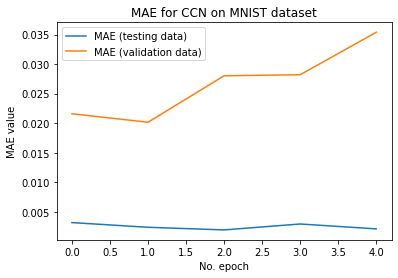

In [35]:
# Plot history: Loss
plt.plot(history.history['loss'], label='MAE (testing data)')
plt.plot(history.history['val_loss'], label='MAE (validation data)')
plt.title('MAE for CCN on MNIST dataset')
plt.ylabel('MAE value')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()

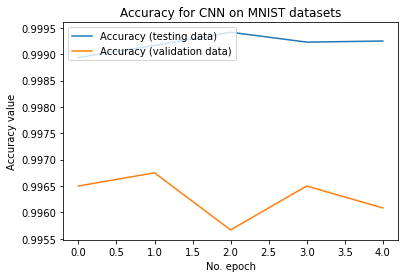

In [36]:
# Plot history: Accuracy
plt.plot(history.history['accuracy'], 
         label='Accuracy (testing data)')
plt.plot(history.history['val_accuracy'], 
         label='Accuracy (validation data)')
plt.title('Accuracy for CNN on MNIST datasets')
plt.ylabel('Accuracy value')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()